In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
df = pd.read_csv('avocado_updated.csv')



In [4]:
df1 = df.drop('Unnamed: 0', axis=1)

In [15]:
df1['Year'] = pd.DatetimeIndex(df1['Date']).year
df1.head()

,Date,Price,Total Volume,Small Avocado,Large Avocado,XLarge Avocado,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Region,Conventional,Organic
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015,Albany,conventional,NaN
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,2015,Albany,conventional,NaN
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,2015,Albany,conventional,NaN
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,2015,Albany,conventional,NaN
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,2015,Albany,conventional,NaN


In [ ]:
#DF with Organic Avocado only
columns = ["Region", "Year", "XLarge Bags", "Large Bags", "Small Bags", "Total Bags", "Xlarge Avocado", "Large Avocado",
          "Small Avocado", "Organic", "Price", "Date"]
dfOrganic = df1.loc[df1["Organic"] == "organic"]
dfOrganic =  dfOrganic.drop('Conventional', axis=1)
dfOrgfinal = dfOrganic.dropna()


In [7]:
###### DF with Conventional Avocado only
columns = ["Region", "Year", "XLarge Bags", "Large Bags", "Small Bags", "Total Bags", "Xlarge Avocado", "Large Avocado",
          "Small Avocado", "Organic", "Price", "Date"]
dfC = df1.loc[df1["Conventional"] == "conventional"]
dfC =  dfC.drop('Organic', axis=1)
dfCfinal = dfC.dropna()


In [8]:
#obtaining mean, max, min, sum of both
ConventTotal = pd.Series(dfCfinal['Price'].sum())
OrganicTotal = pd.Series(dfOrgfinal['Price'].sum())
OrganicMean = pd.Series(dfOrgfinal['Price'].mean())
ConventMean = pd.Series(dfCfinal['Price'].mean())
ConventHigh = pd.Series(dfCfinal['Price'].max())
OrganicHigh = pd.Series(dfOrgfinal['Price'].max())
ConventLow = pd.Series(dfCfinal['Price'].min())
OrganicLow = pd.Series(dfOrgfinal['Price'].min())

In [9]:
#newDF to work with: min, max, mean, totalsold.
dfcomp = pd.DataFrame({"Conventional Total Sold": ConventTotal,
                      "Organic Total Sold": OrganicTotal,
                      "Mean Price Organic": OrganicMean,
                      "Mean Price Conventional": ConventMean,
                      "Highest Price of Conventional": ConventHigh,
                      "Highest Price of Organic": OrganicHigh,
                      "Lowest Price of Conventional": ConventLow,
                      "Lowest Price of Organic": OrganicLow})
dfcomp

,Conventional Total Sold,Organic Total Sold,Mean Price Organic,Mean Price Conventional,Highest Price of Conventional,Highest Price of Organic,Lowest Price of Conventional,Lowest Price of Organic
0,15913.53,22355.95,1.63648,1.164802,2.22,3.25,0.46,0.44


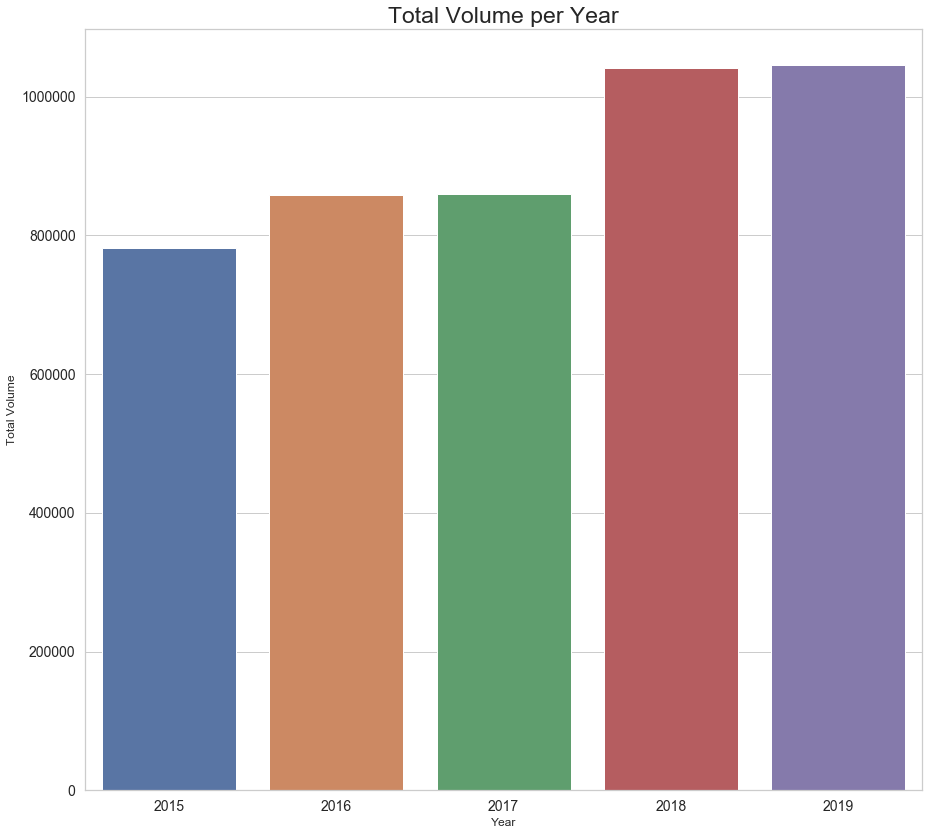

In [50]:
#DF for Volume by Region intake
plt.figure(figsize=(15, 14)) 
ax = plt.bar   
plt.yticks(fontsize=14)  
plt.xticks(fontsize=14) 
sns.barplot(x=df1['Year'], y=df1["Total Volume"], ci=None) 
plt.title('Total Volume per Year', fontsize=23)
plt.savefig('TotalVolbyYear.png')





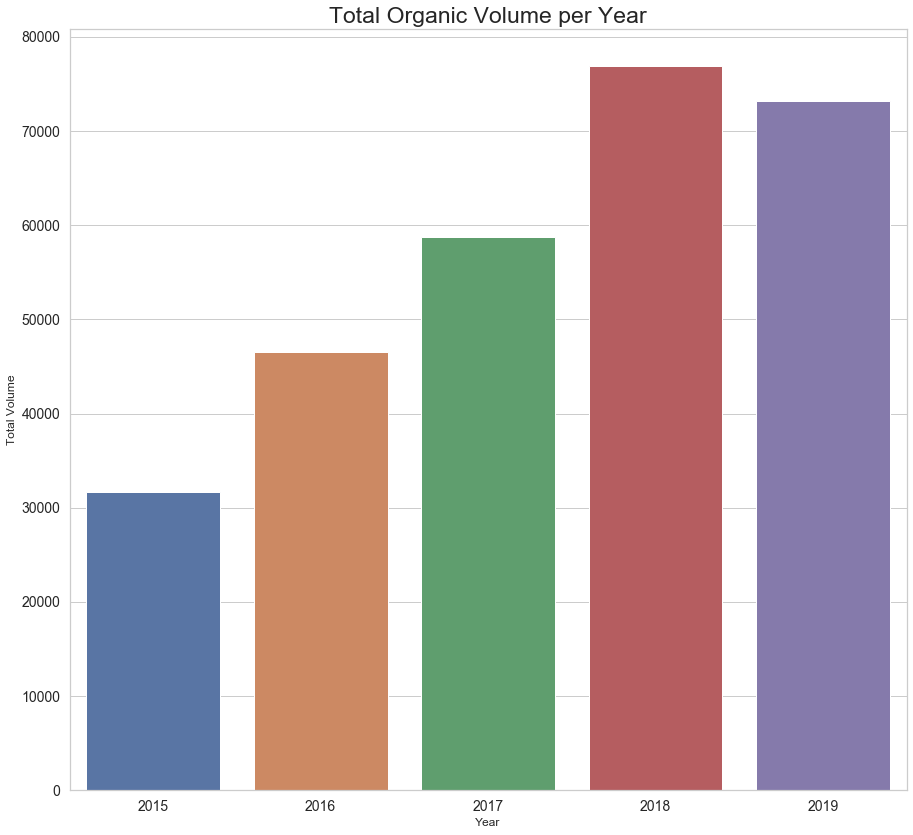

In [51]:


plt.figure(figsize=(15, 14)) 
ax = plt.bar   
plt.yticks(fontsize=14)  
plt.xticks(fontsize=14) 
sns.barplot(x=dfOrgfinal['Year'], y=dfOrgfinal['Total Volume'], ci=None) 
plt.title('Total Organic Volume per Year', fontsize=23)
plt.savefig('TotalOrganicVolbyYear.png')


In [10]:
dfCfinal.describe

<bound method NDFrame.describe of              Date  Price  Total Volume  Small Avocado  Large Avocado  \
0      2015-01-04   1.22      40873.28        2819.50       28287.42   
1      2015-01-11   1.24      41195.08        1002.85       31640.34   
2      2015-01-18   1.17      44511.28         914.14       31540.32   
3      2015-01-25   1.06      45147.50         941.38       33196.16   
4      2015-02-01   0.99      70873.60        1353.90       60017.20   
...           ...    ...           ...            ...            ...   
13657  2015-11-29   0.81     519028.45      335446.83      103635.94   
13658  2015-12-06   0.74     623231.77      398871.12      133434.18   
13659  2015-12-13   0.78     646041.56      437780.91      100110.13   
13660  2015-12-20   0.83     649885.76      389110.55      108176.29   
13661  2015-12-27   0.71     776404.39      451904.51      141599.36   

       XLarge Avocado  Total Bags  Small Bags  Large Bags  XLarge Bags  Year  \
0               49.90

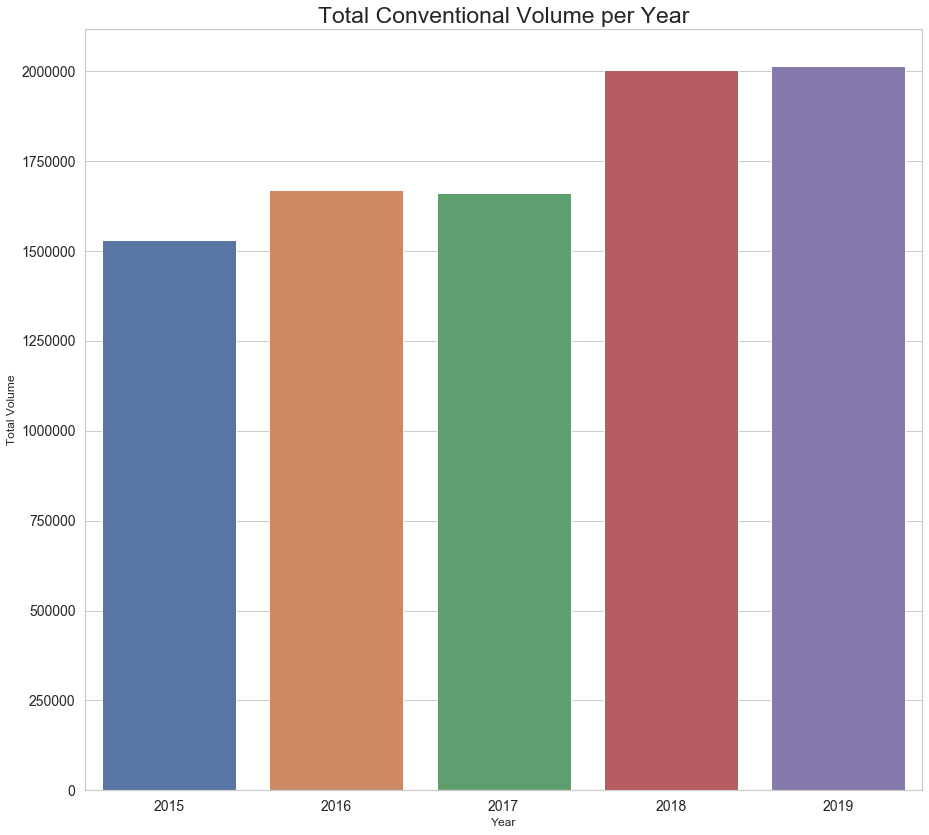

In [38]:


plt.figure(figsize=(15, 14)) 
ax = plt.bar   
plt.yticks(fontsize=14)  
plt.xticks(fontsize=14) 
sns.barplot(x=dfCfinal['Year'], y=dfCfinal['Total Volume'], ci=None) 
plt.title('Total Conventional Volume per Year', fontsize=23)
plt.savefig('TotalConVolbyYear.png')

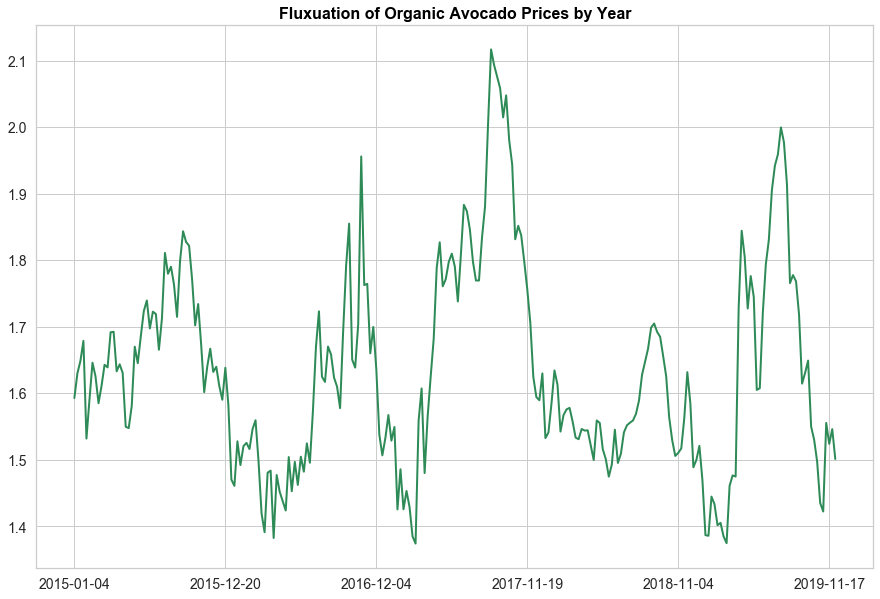

In [12]:
#average avocado prices organic
dfOrgfinal.sort_values('Date', inplace=True) # sort values
#check datatype of index
dfOrgfinal.index 
 
byDate=dfOrgfinal.groupby('Date').mean() #get the mean by date so the plot is less noisy
 
#---Avocado over Time
plt.figure(figsize=(15,10))
ax = plt.subplot(111)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Fluxuation of Organic Avocado Prices by Year', fontsize=16, fontweight="bold", color= 'black')
byDate['Price'].plot(linewidth=2.0, color='seagreen')
ax.set(xlabel='', ylabel='')
plt.savefig('FluxOrganicPrices.png')


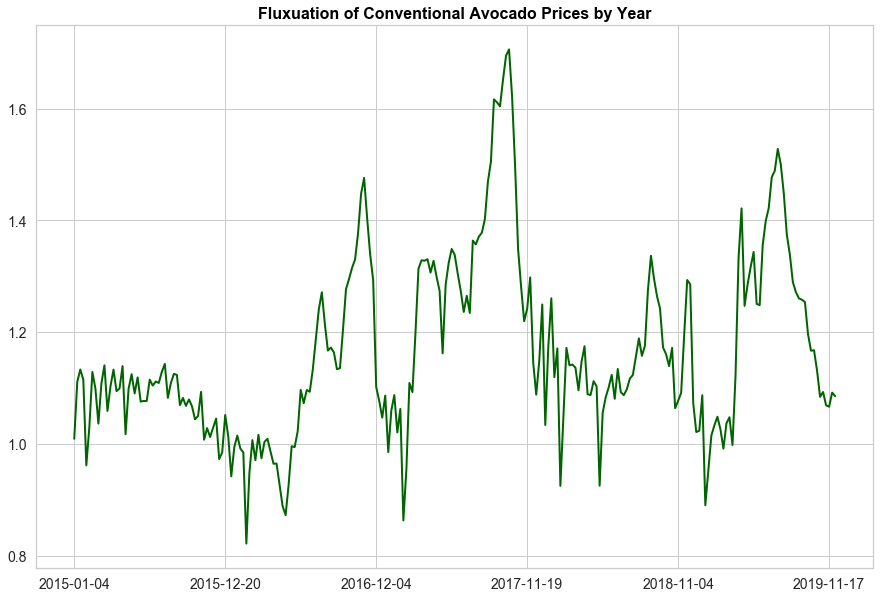

In [13]:
# average avocado prices conventional
dfCfinal.sort_values('Date', inplace=True) # sort values
#check datatype of index
dfCfinal.index 
 
byDate=dfCfinal.groupby('Date').mean() #get the mean by date so the plot is less noisy
 
#---Avocado over Time
plt.figure(figsize=(15,10))
ax = plt.subplot(111)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Fluxuation of Conventional Avocado Prices by Year', fontsize=16, fontweight="bold", color= 'black')
byDate['Price'].plot(linewidth=2.0, color='darkgreen')
ax.set(xlabel='', ylabel='')
plt.savefig('FluxConventionalPrices.png')

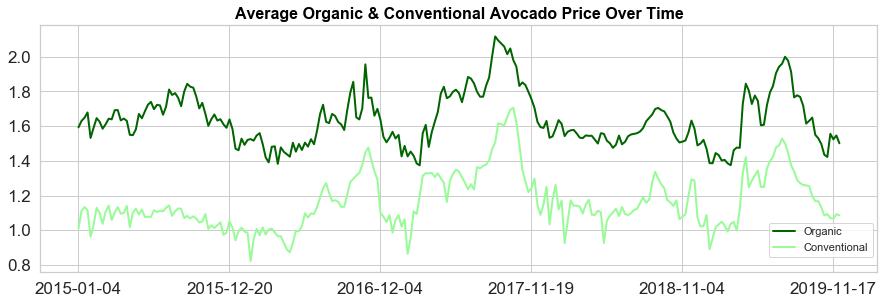

In [14]:
#average avocado prices organic
dfOrgfinal.sort_values('Date', inplace=True) # sort values

#check datatype of index
dfOrgfinal.index 
 
byDate=dfOrgfinal.groupby('Date').mean()
byDate2=dfCfinal.groupby('Date').mean()
#---Avocado over Time
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
plt.title('Average Organic & Conventional Avocado Price Over Time', fontsize=16, fontweight="bold", color= 'black')
byDate['Price'].plot(label ='Organic',linewidth=2.0, color='darkgreen')
byDate2['Price'].plot(label = 'Conventional', linewidth=2.0, color='palegreen')
plt.legend(bbox_to_anchor=(.87, .2), borderaxespad=0.)
ax.set(xlabel='', ylabel='')
plt.savefig('FluxConventional_OrganicPrices2.png')

#Find out why this isnt working
#average avocado prices organic
df2.sort_values('year', inplace=True) # sort values

byYear=df2.groupby('Date').mean()
byYear2=df2.groupby('Date').mean()
#---Avocado over Time
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
plt.title('Organic & Conventional Avocado Sold Volume Over Time', fontsize=16, fontweight="bold", color= 'black')
byYear[('type') == 'conventional'].plot(label ='organic',linewidth=2.0, color='darkgreen')
byYear2[('type') == 'organic'].plot(label = 'conventional', linewidth=2.0, color='lightgreen')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set(xlabel='', ylabel='')


In [15]:
dfCfinal.dtypes

Date               object
Price             float64
Total Volume      float64
Small Avocado     float64
Large Avocado     float64
XLarge Avocado    float64
Total Bags        float64
Small Bags        float64
Large Bags        float64
XLarge Bags       float64
Year                int64
Region             object
Conventional       object
dtype: object

In [16]:
dfOrgfinal.dtypes

Date               object
Price             float64
Total Volume      float64
Small Avocado     float64
Large Avocado     float64
XLarge Avocado    float64
Total Bags        float64
Small Bags        float64
Large Bags        float64
XLarge Bags       float64
Year                int64
Region             object
Organic            object
dtype: object

In [17]:
dfCfinal['Total Volume'].apply(int)
dfOrgfinal['Total Volume'].apply(int)

13662       1373
16951       7446
17405       1012
17658      61615
16192       3930
          ...   
26765    1218328
20894      67166
25195      98392
19428      84384
20492      13854
Name: Total Volume, Length: 13661, dtype: int64

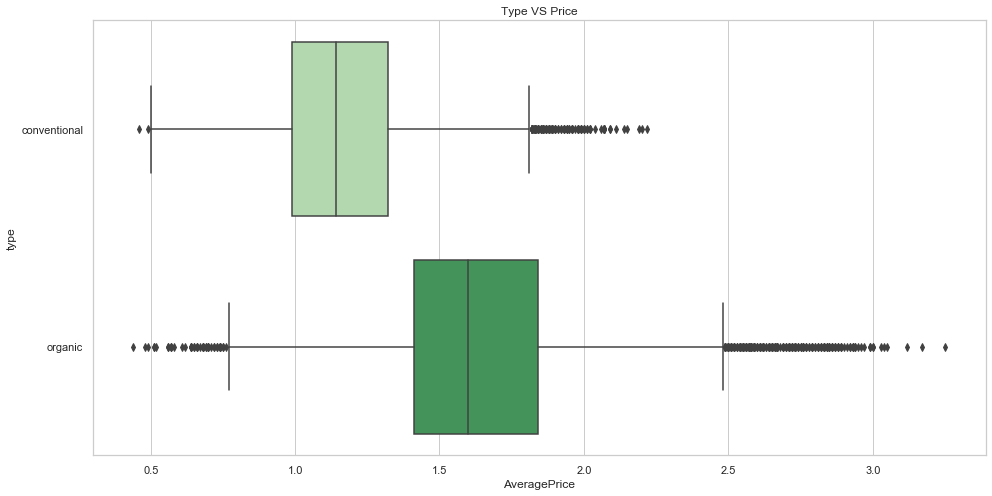

In [18]:
df2 = pd.read_csv('avocado.csv')
plt.figure(figsize=(16,8))
plt.title("Type VS Price")
sns.boxplot(y="type", x="AveragePrice", data= df2, palette="Greens")
plt.savefig('PriceComparisonboxplot2.png')
plt.show()

In [19]:
dfcomp2 = df2.copy()


In [20]:
dfcomp2.drop(['4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis = 1) 

,Date,AveragePrice,Total Volume,type,year,region
0,2015-01-04,1.22,40873.28,conventional,2015,Albany
1,2015-01-11,1.24,41195.08,conventional,2015,Albany
2,2015-01-18,1.17,44511.28,conventional,2015,Albany
3,2015-01-25,1.06,45147.50,conventional,2015,Albany
4,2015-02-01,0.99,70873.60,conventional,2015,Albany
...,...,...,...,...,...,...
27318,2015-11-22,1.97,6249.43,organic,2015,WestTexNewMexico
27319,2015-11-29,2.08,4638.10,organic,2015,WestTexNewMexico
27320,2015-12-13,1.80,7836.65,organic,2015,WestTexNewMexico
27321,2015-12-20,1.92,6255.19,organic,2015,WestTexNewMexico
